In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


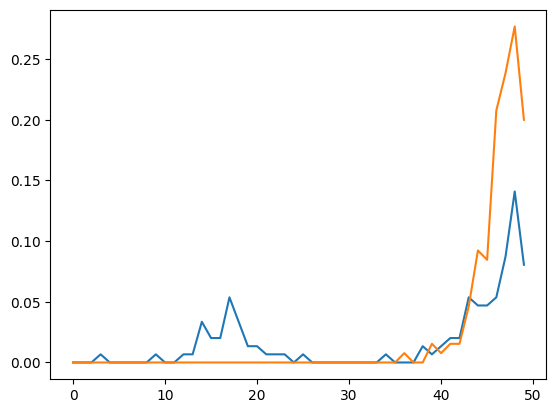

In [12]:
f = open("pull.dat", "r")
data = []
t = 0
for l in f:
    if len(l.split(" ")) == 4:
        try:
            n = np.int32(l.split(" ")[0])
            if n == 1:
                t += 1
            v = np.float32(l.split(" ")[1])
            b = np.int32(l.split(" ")[2])
            if b == 2: # O-C-C-O
                data.append([t, v])
        except:
            pass
f.close()
data = np.array(data)

all_n = np.int32(data[:,0])
before = []
after = []
for n in range(1,t):
    x = data[all_n == n][:,1]
    a, b = np.histogram(x, range=(0, 180), bins=50)
    b = (b[1:]+b[:-1])/2
    if n < 150:
        before.append(a)
    elif n > 170:
        after.append(a)
before = np.mean(before, axis=0)
after = np.mean(after, axis=0)

plt.plot(before, "-")
plt.plot(after, "-")
plt.show()